In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

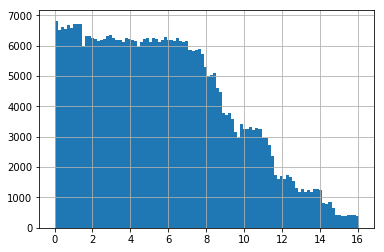

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((295168, 1), (295168, 100), (295168,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 15: 24269}'

In [20]:
quakes=set(qdf['index'])
quakes

{1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((295168, 100), (295168, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 40min 20s, sys: 5min 19s, total: 45min 39s
Wall time: 4min 9s


In [26]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 257357, 2624, 3000)

In [27]:
qdf.iloc[topidxs].head()

index
index                    
quake_10_o28006733     10
quake_06_o17988314      6
quake_10_o28002010     10
quake_06_o23373381      6
quake_06_o23373373      6

In [28]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [29]:
idxdf.shape

(3000, 2624)

In [30]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0    10     1    13     4    15     9     6     8     9     6  ...    15   
1     6    15    13     4    15     9     6    10     5     6  ...    15   
2    10     1    13     4    15     9     6    13    10     6  ...    15   
3     6    15    13     4    15     9     6    10     3     6  ...    15   
4     6     1    13     4    15     9     6    13     9     6  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    10    10    15    15    11    15    15     8    15  
1    10    10    15    15    15    15    15     8    15  
2    10     1    15     1    11    15    15     8    15  
3    10    10    15     1     1    15    15     8     1  
4    10     4    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [31]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

1 3 4 5 6 8 9 10 11 12 13 15 


0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
0.0    0.41  0.87  0.59  0.57  0.41  0.70  0.66  0.32  0.67  0.86  0.71  0.21
0.1    0.38  0.09  0.23  0.32  0.28  0.24  0.24  0.33  0.29  0.12  0.27  0.27
0.2    0.16  0.03  0.13  0.09  0.11  0.05  0.08  0.22  0.04  0.02  0.02  0.13
0.3    0.05  0.01  0.05  0.01  0.08  0.01  0.02  0.07  0.00  0.00  0.00  0.06
0.4    0.01  0.00  0.01  0.00  0.07   NaN  0.01  0.03   NaN   NaN   NaN  0.04
0.5     NaN   NaN  0.00   NaN  0.05   NaN  0.00  0.02   NaN   NaN   NaN  0.04
0.6    0.00   NaN   NaN   NaN  0.01   NaN   NaN  0.01   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10

0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.13
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.18
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.22
0.6    0.00   NaN   NaN   NaN  0.01   NaN   NaN  0.01   NaN   NaN   NaN  0.26
0.5     NaN   NaN  0.00   NaN  0.05   NaN  0.00  0.03   NaN   NaN   NaN  0.30
0.4    0.01  0.00  0.01  0.00  0.13   NaN  0.01  0.06   NaN   NaN   NaN  0.34
0.3    0.05  0.01  0.06  0.01  0.21  0.01  0.03  0.13  0.00  0.00  0.00  0.40
0.2    0.21  0.04  0.19  0.11  0.31  0.06  0.10  0.35  0.04  0.02  0.02  0.52
0.1    0.59  0.13  0.41  0.43  0.59  0.30  0.34  0.68  0.33  0.14  0.29  0.79
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [32]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

1 3 4 5 6 8 9 10 11 12 13 15 


0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
0.0    0.37  0.87  0.56  0.58  0.36  0.68  0.64  0.28  0.68  0.86  0.70  0.19
0.1    0.42  0.10  0.25  0.34  0.29  0.27  0.27  0.35  0.29  0.12  0.28  0.28
0.2    0.17  0.03  0.14  0.08  0.12  0.05  0.07  0.25  0.02  0.01  0.02  0.13
0.3    0.03  0.00  0.04  0.01  0.10  0.00  0.02  0.06  0.00  0.00  0.00  0.07
0.4    0.00   NaN  0.00   NaN  0.09   NaN  0.00  0.03   NaN   NaN   NaN  0.05
0.5     NaN   NaN   NaN   NaN  0.03   NaN   NaN  0.02   NaN   NaN   NaN  0.04
0.6     NaN   NaN   NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.03
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.08

0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
0.0    0.37  0.87  0.56  0.58  0.36  0.68  0.64  0.28  0.68  0.86  0.70  0.19
0.1    0.79  0.97  0.81  0.91  0.66  0.95  0.91  0.63  0.97  0.99  0.98  0.47
0.2    0.97  1.00  0.96  0.99  0.78  1.00  0.98  0.89  1.00  1.00  1.00  0.61
0.3    1.00  1.00  1.00  1.00  0.88  1.00  1.00  0.95  1.00  1.00  1.00  0.67
0.4    1.00   NaN  1.00   NaN  0.97   NaN  1.00  0.98   NaN   NaN   NaN  0.72
0.5     NaN   NaN   NaN   NaN  1.00   NaN   NaN  1.00   NaN   NaN   NaN  0.77
0.6     NaN   NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN   NaN  0.80
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.85
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.89
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [33]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

1 3 4 5 6 8 9 10 11 12 13 15 


0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
0.0    0.33  0.86  0.54  0.58  0.34  0.67  0.63  0.24  0.67  0.86  0.70  0.19
0.1    0.48  0.10  0.27  0.35  0.30  0.28  0.28  0.40  0.31  0.12  0.28  0.28
0.2    0.16  0.03  0.15  0.07  0.13  0.05  0.07  0.25  0.02  0.01  0.01  0.14
0.3    0.02  0.00  0.04  0.00  0.12  0.00  0.01  0.06  0.00  0.00   NaN  0.07
0.4    0.00   NaN  0.00   NaN  0.10   NaN   NaN  0.05   NaN   NaN   NaN  0.06
0.5     NaN   NaN   NaN   NaN  0.01   NaN   NaN  0.00   NaN   NaN   NaN  0.05
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.03
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06

0                                                                  
qno      1     3     4     5     6     8     9     10    11    12    13    15
index                                                                        
0.0    0.33  0.86  0.54  0.58  0.34  0.67  0.63  0.24  0.67  0.86  0.70  0.19
0.1    0.82  0.97  0.81  0.92  0.64  0.95  0.91  0.64  0.98  0.99  0.99  0.47
0.2    0.97  1.00  0.96  1.00  0.77  1.00  0.99  0.89  1.00  1.00  1.00  0.61
0.3    1.00  1.00  1.00  1.00  0.89  1.00  1.00  0.95  1.00  1.00   NaN  0.68
0.4    1.00   NaN  1.00   NaN  0.99   NaN   NaN  1.00   NaN   NaN   NaN  0.74
0.5     NaN   NaN   NaN   NaN  1.00   NaN   NaN  1.00   NaN   NaN   NaN  0.78
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.83
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.86
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.89
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.94
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [34]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      724852
3      146169
4      560158
5      463668
6     1107937
8      335312
9      401105
10    1015977
11     319433
12     141736
13     286429
15    2369224
Name: index, dtype: int64

In [35]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     27295
3     17747
4     25433
5     19988
6     15046
8     18313
9     21925
10    28322
11    23779
12    17019
13    18712
15    23778
Name: index, dtype: int64

In [36]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((257357, 1), (257357, 100), (257357,))

In [37]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 3 train quake 1
(27295, 100) (27295,) (17747, 100) (17747,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07523	valid_1's l1: 1.76543
[100]	training's l1: 0.731043	valid_1's l1: 1.63536
[150]	training's l1: 0.567293	valid_1's l1: 1.61209
[200]	training's l1: 0.482482	valid_1's l1: 1.60968
[250]	training's l1: 0.432322	valid_1's l1: 1.61185
[300]	training's l1: 0.398564	valid_1's l1: 1.61497
[350]	training's l1: 0.37196	valid_1's l1: 1.61421
[400]	training's l1: 0.350212	valid_1's l1: 1.61452
Early stopping, best iteration is:
[229]	training's l1: 0.451148	valid_1's l1: 1.60925
quake  1 3 (1.6092456334509708, 229)
valid quake 4 train quake 1
(27295, 100) (27295,) (25433, 100) (25433,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07523	valid_1's l1: 2.04557
[100]	training's l1: 0.731043	valid_1's l1: 2.03207
[150]	training's l1: 0.567293	valid_1's l1: 2.04748
[200]	training's 

[150]	training's l1: 0.567293	valid_1's l1: 2.08527
[200]	training's l1: 0.482482	valid_1's l1: 2.1191
Early stopping, best iteration is:
[15]	training's l1: 1.74709	valid_1's l1: 1.69723
quake  1 15 (1.6972338719851006, 15)
valid quake 1 train quake 3
(17747, 100) (17747,) (27295, 100) (27295,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.788155	valid_1's l1: 2.43409
[100]	training's l1: 0.500352	valid_1's l1: 2.39161
[150]	training's l1: 0.349313	valid_1's l1: 2.3722
[200]	training's l1: 0.266276	valid_1's l1: 2.36125
[250]	training's l1: 0.21865	valid_1's l1: 2.36097
[300]	training's l1: 0.18882	valid_1's l1: 2.36046
[350]	training's l1: 0.171661	valid_1's l1: 2.36023
[400]	training's l1: 0.160533	valid_1's l1: 2.35861
[450]	training's l1: 0.152469	valid_1's l1: 2.35921
[500]	training's l1: 0.146135	valid_1's l1: 2.3587
[550]	training's l1: 0.140675	valid_1's l1: 2.35916
[600]	training's l1: 0.135878	valid_1's l1: 2.35814
[650]	training's l1: 

[200]	training's l1: 0.266276	valid_1's l1: 1.48152
[250]	training's l1: 0.21865	valid_1's l1: 1.48737
[300]	training's l1: 0.18882	valid_1's l1: 1.49171
[350]	training's l1: 0.171661	valid_1's l1: 1.4938
Early stopping, best iteration is:
[185]	training's l1: 0.285843	valid_1's l1: 1.4796
quake  3 15 (1.479604524460483, 185)
valid quake 1 train quake 4
(25433, 100) (25433,) (27295, 100) (27295,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.10512	valid_1's l1: 2.03801
[100]	training's l1: 0.752105	valid_1's l1: 2.07773
[150]	training's l1: 0.58533	valid_1's l1: 2.11959
[200]	training's l1: 0.499542	valid_1's l1: 2.14025
Early stopping, best iteration is:
[26]	training's l1: 1.43642	valid_1's l1: 2.02641
quake  4 1 (2.0264069347129143, 26)
valid quake 3 train quake 4
(25433, 100) (25433,) (17747, 100) (17747,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.10512	valid_1's l1: 2.40479
[100]	training's l1: 0.752

[200]	training's l1: 0.276945	valid_1's l1: 2.94356
Early stopping, best iteration is:
[19]	training's l1: 1.12602	valid_1's l1: 2.71103
quake  5 4 (2.711030629384703, 19)
quake  5 5 (nan, nan)
valid quake 6 train quake 5
(19988, 100) (19988,) (15046, 100) (15046,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.760206	valid_1's l1: 1.07999
[100]	training's l1: 0.495955	valid_1's l1: 0.955295
[150]	training's l1: 0.354409	valid_1's l1: 0.908802
[200]	training's l1: 0.276945	valid_1's l1: 0.893499
[250]	training's l1: 0.235475	valid_1's l1: 0.883401
[300]	training's l1: 0.211219	valid_1's l1: 0.880935
[350]	training's l1: 0.19627	valid_1's l1: 0.879232
[400]	training's l1: 0.184826	valid_1's l1: 0.877671
[450]	training's l1: 0.175142	valid_1's l1: 0.878472
[500]	training's l1: 0.166904	valid_1's l1: 0.880025
[550]	training's l1: 0.16001	valid_1's l1: 0.881583
[600]	training's l1: 0.153827	valid_1's l1: 0.882403
Early stopping, best iteration is:
[405

[1000]	training's l1: 0.10469	valid_1's l1: 1.03534
[1050]	training's l1: 0.102447	valid_1's l1: 1.03441
[1100]	training's l1: 0.100478	valid_1's l1: 1.03423
[1150]	training's l1: 0.0985722	valid_1's l1: 1.03445
[1200]	training's l1: 0.0968088	valid_1's l1: 1.0347
[1250]	training's l1: 0.0950956	valid_1's l1: 1.03429
[1300]	training's l1: 0.0933802	valid_1's l1: 1.03321
[1350]	training's l1: 0.0917944	valid_1's l1: 1.03291
[1400]	training's l1: 0.090304	valid_1's l1: 1.03283
[1450]	training's l1: 0.0888369	valid_1's l1: 1.03207
[1500]	training's l1: 0.0873684	valid_1's l1: 1.03183
quake  6 3 (1.0318268950841674, 0)
valid quake 4 train quake 6
(15046, 100) (15046,) (25433, 100) (25433,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.701933	valid_1's l1: 2.87747
[100]	training's l1: 0.457227	valid_1's l1: 2.86063
[150]	training's l1: 0.325387	valid_1's l1: 2.85168
[200]	training's l1: 0.250791	valid_1's l1: 2.84491
[250]	training's l1: 0.209458	valid

[350]	training's l1: 0.168686	valid_1's l1: 2.24975
[400]	training's l1: 0.157081	valid_1's l1: 2.24717
[450]	training's l1: 0.148269	valid_1's l1: 2.24434
[500]	training's l1: 0.140952	valid_1's l1: 2.24301
[550]	training's l1: 0.135094	valid_1's l1: 2.23974
[600]	training's l1: 0.129959	valid_1's l1: 2.23872
[650]	training's l1: 0.125443	valid_1's l1: 2.23896
[700]	training's l1: 0.121533	valid_1's l1: 2.23835
[750]	training's l1: 0.118075	valid_1's l1: 2.23702
[800]	training's l1: 0.115179	valid_1's l1: 2.23561
[850]	training's l1: 0.112223	valid_1's l1: 2.2347
[900]	training's l1: 0.109473	valid_1's l1: 2.23289
[950]	training's l1: 0.107018	valid_1's l1: 2.2314
[1000]	training's l1: 0.10469	valid_1's l1: 2.23087
[1050]	training's l1: 0.102447	valid_1's l1: 2.2296
[1100]	training's l1: 0.100478	valid_1's l1: 2.22928
[1150]	training's l1: 0.0985722	valid_1's l1: 2.22878
[1200]	training's l1: 0.0968088	valid_1's l1: 2.22864
[1250]	training's l1: 0.0950956	valid_1's l1: 2.22781
[1300]	

Early stopping, best iteration is:
[34]	training's l1: 0.896412	valid_1's l1: 2.73679
quake  8 10 (2.7367878578955964, 34)
valid quake 11 train quake 8
(18313, 100) (18313,) (23779, 100) (23779,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.747584	valid_1's l1: 2.35846
[100]	training's l1: 0.489366	valid_1's l1: 2.40771
[150]	training's l1: 0.346318	valid_1's l1: 2.45267
[200]	training's l1: 0.264967	valid_1's l1: 2.47999
Early stopping, best iteration is:
[44]	training's l1: 0.797008	valid_1's l1: 2.35427
quake  8 11 (2.354274686644051, 44)
valid quake 12 train quake 8
(18313, 100) (18313,) (17019, 100) (17019,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.747584	valid_1's l1: 1.20134
[100]	training's l1: 0.489366	valid_1's l1: 1.11898
[150]	training's l1: 0.346318	valid_1's l1: 1.10315
[200]	training's l1: 0.264967	valid_1's l1: 1.10431
[250]	training's l1: 0.221472	valid_1's l1: 1.10635
[300]	training's 

[400]	training's l1: 0.227908	valid_1's l1: 1.79355
[450]	training's l1: 0.215683	valid_1's l1: 1.79293
[500]	training's l1: 0.205574	valid_1's l1: 1.79141
[550]	training's l1: 0.196678	valid_1's l1: 1.79067
[600]	training's l1: 0.189167	valid_1's l1: 1.78991
[650]	training's l1: 0.182738	valid_1's l1: 1.7892
[700]	training's l1: 0.177124	valid_1's l1: 1.78855
[750]	training's l1: 0.172039	valid_1's l1: 1.78855
[800]	training's l1: 0.167269	valid_1's l1: 1.78776
[850]	training's l1: 0.162718	valid_1's l1: 1.7868
[900]	training's l1: 0.158898	valid_1's l1: 1.78669
[950]	training's l1: 0.155146	valid_1's l1: 1.78634
[1000]	training's l1: 0.151725	valid_1's l1: 1.78604
[1050]	training's l1: 0.148666	valid_1's l1: 1.7856
[1100]	training's l1: 0.145649	valid_1's l1: 1.785
[1150]	training's l1: 0.142935	valid_1's l1: 1.78461
[1200]	training's l1: 0.140422	valid_1's l1: 1.78357
[1250]	training's l1: 0.138065	valid_1's l1: 1.78309
[1300]	training's l1: 0.135814	valid_1's l1: 1.78297
[1350]	tra

[100]	training's l1: 0.711896	valid_1's l1: 3.03211
[150]	training's l1: 0.557352	valid_1's l1: 3.07216
[200]	training's l1: 0.479251	valid_1's l1: 3.10353
Early stopping, best iteration is:
[4]	training's l1: 2.45644	valid_1's l1: 2.38123
quake  10 8 (2.381232440163873, 4)
valid quake 9 train quake 10
(28322, 100) (28322,) (21925, 100) (21925,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05504	valid_1's l1: 1.70378
[100]	training's l1: 0.711896	valid_1's l1: 1.65326
[150]	training's l1: 0.557352	valid_1's l1: 1.64833
[200]	training's l1: 0.479251	valid_1's l1: 1.65674
[250]	training's l1: 0.432819	valid_1's l1: 1.65882
[300]	training's l1: 0.402208	valid_1's l1: 1.65842
Early stopping, best iteration is:
[135]	training's l1: 0.592735	valid_1's l1: 1.64809
quake  10 9 (1.6480889852820055, 135)
quake  10 10 (nan, nan)
valid quake 11 train quake 10
(28322, 100) (28322,) (23779, 100) (23779,)
Training until validation scores don't improve for 200 r

[400]	training's l1: 0.262762	valid_1's l1: 1.09846
[450]	training's l1: 0.250384	valid_1's l1: 1.09816
[500]	training's l1: 0.23888	valid_1's l1: 1.09735
[550]	training's l1: 0.228824	valid_1's l1: 1.09681
[600]	training's l1: 0.220318	valid_1's l1: 1.09628
[650]	training's l1: 0.213108	valid_1's l1: 1.09615
[700]	training's l1: 0.206454	valid_1's l1: 1.09616
[750]	training's l1: 0.200489	valid_1's l1: 1.0963
[800]	training's l1: 0.195313	valid_1's l1: 1.09623
[850]	training's l1: 0.190307	valid_1's l1: 1.0964
Early stopping, best iteration is:
[665]	training's l1: 0.211171	valid_1's l1: 1.09599
quake  11 10 (1.0959854844290164, 665)
quake  11 11 (nan, nan)
valid quake 12 train quake 11
(23779, 100) (23779,) (17019, 100) (17019,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.916638	valid_1's l1: 1.85651
[100]	training's l1: 0.596464	valid_1's l1: 1.83085
[150]	training's l1: 0.442716	valid_1's l1: 1.84818
[200]	training's l1: 0.365959	valid_1's l

[450]	training's l1: 0.157848	valid_1's l1: 1.78502
[500]	training's l1: 0.150729	valid_1's l1: 1.78597
Early stopping, best iteration is:
[325]	training's l1: 0.183413	valid_1's l1: 1.78363
quake  12 11 (1.7836314824022934, 325)
quake  12 12 (nan, nan)
valid quake 13 train quake 12
(17019, 100) (17019,) (18712, 100) (18712,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.7358	valid_1's l1: 1.03811
[100]	training's l1: 0.474163	valid_1's l1: 0.961306
[150]	training's l1: 0.334371	valid_1's l1: 0.946838
[200]	training's l1: 0.25695	valid_1's l1: 0.946389
[250]	training's l1: 0.215423	valid_1's l1: 0.948687
[300]	training's l1: 0.191706	valid_1's l1: 0.948945
[350]	training's l1: 0.176635	valid_1's l1: 0.949565
Early stopping, best iteration is:
[160]	training's l1: 0.31535	valid_1's l1: 0.94543
quake  12 13 (0.9454296945564843, 160)
valid quake 15 train quake 12
(17019, 100) (17019,) (23778, 100) (23778,)
Training until validation scores don't impro

[300]	training's l1: 0.257478	valid_1's l1: 1.26609
[350]	training's l1: 0.238508	valid_1's l1: 1.26474
[400]	training's l1: 0.222965	valid_1's l1: 1.26577
[450]	training's l1: 0.209592	valid_1's l1: 1.26547
[500]	training's l1: 0.198444	valid_1's l1: 1.26466
Early stopping, best iteration is:
[325]	training's l1: 0.247695	valid_1's l1: 1.26442
quake  13 9 (1.2644184357685462, 325)
valid quake 10 train quake 13
(18712, 100) (18712,) (28322, 100) (28322,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.824992	valid_1's l1: 2.44097
[100]	training's l1: 0.549269	valid_1's l1: 2.3699
[150]	training's l1: 0.405336	valid_1's l1: 2.33991
[200]	training's l1: 0.326488	valid_1's l1: 2.32572
[250]	training's l1: 0.283511	valid_1's l1: 2.31996
[300]	training's l1: 0.257478	valid_1's l1: 2.31904
[350]	training's l1: 0.238508	valid_1's l1: 2.32017
[400]	training's l1: 0.222965	valid_1's l1: 2.32122
[450]	training's l1: 0.209592	valid_1's l1: 2.32319
Early stoppi

[300]	training's l1: 0.221773	valid_1's l1: 1.42413
[350]	training's l1: 0.206302	valid_1's l1: 1.42165
[400]	training's l1: 0.194596	valid_1's l1: 1.40868
[450]	training's l1: 0.185061	valid_1's l1: 1.40573
[500]	training's l1: 0.177053	valid_1's l1: 1.40517
[550]	training's l1: 0.170278	valid_1's l1: 1.3996
[600]	training's l1: 0.164201	valid_1's l1: 1.39658
[650]	training's l1: 0.158846	valid_1's l1: 1.39232
[700]	training's l1: 0.154214	valid_1's l1: 1.39049
[750]	training's l1: 0.150183	valid_1's l1: 1.38763
[800]	training's l1: 0.146245	valid_1's l1: 1.38454
[850]	training's l1: 0.142841	valid_1's l1: 1.38331
[900]	training's l1: 0.139496	valid_1's l1: 1.38163
[950]	training's l1: 0.136527	valid_1's l1: 1.37658
[1000]	training's l1: 0.13376	valid_1's l1: 1.37503
[1050]	training's l1: 0.131108	valid_1's l1: 1.37252
[1100]	training's l1: 0.128715	valid_1's l1: 1.37114
[1150]	training's l1: 0.126375	valid_1's l1: 1.36804
[1200]	training's l1: 0.124126	valid_1's l1: 1.36683
[1250]	tr

In [40]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [42]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [43]:
pvdf.style.apply(highlight_max,axis=1)

In [44]:
pvdf.style.apply(highlight_min,axis=1)

In [45]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))